# Antes de empezar:
- Lee el archivo README.md
- Comenta tanto como puedas y utiliza los recursos (archivo README.md)
- ¡Feliz aprendizaje!

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest

from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway
from scipy.stats import sem

# Reto 1 - Explorando los Datos

En este reto, examinaremos todos los salarios de los empleados de la Ciudad de Chicago. Comenzaremos cargando el conjunto de datos y examinando su contenido.

In [2]:
# Run this code:
salaries = pd.read_csv('../data/Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examina el conjunto de datos `salaries` utilizando la función `head` que se muestra a continuación.

In [3]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


# Reto 2 - Pruebas de Hipótesis

En esta sección del laboratorio, vamos a probar si el salario por hora de todos los trabajadores por hora es significativamente diferente de $30/hora. Importa la función correcta para la prueba de una muestra desde scipy y realiza la prueba de hipótesis para un intervalo de confianza de dos lados del 95%.

In [5]:
hourly_rate = salaries[salaries['Salary or Hourly'] == 'Hourly']
hourly_rate

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
...,...,...,...,...,...,...,...,...
33164,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,40.0,NaN,46.10
33168,"ZWARYCZ MANN, IRENE A",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
33169,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,NaN,35.60
33174,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,NaN,46.35


Text(0.5, 1.0, 'Histogram of Hourly Rate')

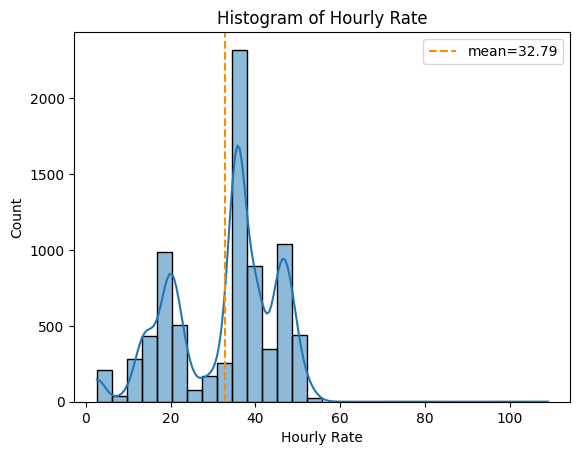

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_hourly = hourly_rate['Hourly Rate'].mean()

sns.histplot(data=hourly_rate, x='Hourly Rate', bins=30, kde=True)
plt.axvline(hourly_rate['Hourly Rate'].mean(), color='darkorange', ls='--', lw=1.5, label=f'mean={mean_hourly:.2f}')
plt.legend()
plt.title("Histogram of Hourly Rate")

In [7]:
hourly_rate[['Hourly Rate']].describe()

,Hourly Rate
count,8022.000000
mean,32.788558
std,12.112573
min,2.650000
25%,21.200000
50%,35.600000
75%,40.200000
max,109.000000


In [8]:
from scipy import stats

# Realizar la prueba de hipótesis
t_statistic, p_value = stats.ttest_1samp(hourly_rate['Hourly Rate'], 30)

In [9]:
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: 20.6198057854942
P-Value: 4.3230240486229894e-92


*T-Statistic: 20.6198057854942 -> Este valor indica que la media de tu muestra se encuentra 20.62 desviaciones estándar por encima de la media hipotética de $30/hora. Este es un valor extremadamente alto, sugiriendo una diferencia muy significativa.*

In [10]:
# Si el valor p < 0.05: Rechazas la hipótesis nula. Esto indica que hay evidencia suficiente para afirmar que el salario promedio por hora es significativamente diferente de $30/hora.
# Si el valor p ≥ 0.05: No rechazas la hipótesis nula. Esto significa que no hay suficiente evidencia para afirmar que el salario promedio por hora es diferente de $30/hora.

assert p_value >= 0.05, "p < 0.05, por tanto rechazo la hipótesis nula"

AssertionError: p < 0.05, por tanto rechazo la hipótesis nula

*P-Value: 4.3230240486229894e-92 -> Este valor es prácticamente cero, lo que significa que hay una probabilidad extremadamente baja de observar un valor tan extremo bajo la hipótesis nula (que el salario promedio es $30/hora). Dado que es mucho menor que 0.05, puedes rechazar la hipótesis nula. Esto indica que hay evidencia contundente para afirmar que el salario promedio por hora es significativamente diferente de $30/hora.*

# Reto 3 - Construyendo Intervalos de Confianza

Aunque probar nuestra hipótesis es una excelente manera de obtener evidencia empírica para aceptar o rechazar la hipótesis, otra forma de recopilar evidencia es creando un intervalo de confianza. Un intervalo de confianza nos brinda información sobre la media verdadera de la población. Por lo tanto, para un intervalo de confianza del 95%, estamos seguros en un 95% de que la media de la población se encuentra dentro del intervalo de confianza.

Para leer más sobre los intervalos de confianza, haz clic [aquí](https://es.wikipedia.org/wiki/Intervalo_de_confianza).

En la celda a continuación, construiremos un intervalo de confianza del 95% para el salario por hora medio de todos los trabajadores por hora.

El intervalo de confianza se calcula en SciPy utilizando la función `t.interval`. Puedes leer más sobre esta función [aquí](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

Para calcular el intervalo de confianza del salario por hora, usa 0.95 para el nivel de confianza, el número de filas - 1 para los grados de libertad, la media de la muestra para el parámetro de ubicación y el error estándar para la escala. El error estándar se puede calcular utilizando [esta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) función en SciPy.

In [11]:
# Calcular el intervalo de confianza del 95%
confidence_interval = stats.t.interval(confidence=0.95, df=len(hourly_rate['Hourly Rate'])-1, loc=np.mean(hourly_rate['Hourly Rate']), scale=stats.sem(hourly_rate['Hourly Rate']))
confidence_interval

(np.float64(32.52345834488425), np.float64(33.05365708767623))

In [12]:
print("Intervalo de confianza del 95%:", confidence_interval)

Intervalo de confianza del 95%: (np.float64(32.52345834488425), np.float64(33.05365708767623))


*Este intervalo indica que estamos un 95% seguros de que la media del salario por hora de los trabajadores en tu muestra se encuentra entre $32.52 y $33.05. Como este intervalo no incluye $30, refuerza aún más la conclusión de que el salario promedio por hora es significativamente diferente de $30/hora.*

# Reto 4 - Pruebas de Hipótesis de Proporciones

Otro tipo de prueba de una muestra es una prueba de hipótesis de proporciones. En esta prueba, examinamos si la proporción de un grupo en nuestra muestra es significativamente diferente de una fracción.

Puedes leer más sobre las pruebas de proporción de una muestra [aquí](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

En la celda a continuación, utiliza la función `proportions_ztest` de `statsmodels` para realizar una prueba de hipótesis que determinará si el número de trabajadores por hora en la Ciudad de Chicago es significativamente diferente del 25% en el nivel de confianza del 95%.

In [13]:
hourly_employees = len(hourly_rate)
hourly_employees

8022

In [14]:
total_employees = len(salaries)
total_employees

33183

In [15]:
from statsmodels.stats.proportion import proportions_ztest

# La proporción esperada es del 25%, así que puedes definirla de la siguiente manera:
expected_proportion = 0.25
expected_count = expected_proportion * total_employees

# Realizar la prueba de proporciones
test_statistic, p_value_prop = proportions_ztest(count=hourly_employees, nobs=total_employees, value=expected_proportion)

print(f"Test Statistic for Proportions: {test_statistic}")
print(f"P-Value for Proportions: {p_value_prop}")

Test Statistic for Proportions: -3.5099964213703005
P-Value for Proportions: 0.0004481127249057967


In [18]:
expected_count

8295.75

In [16]:
# Si el valor p < 0.05: Rechazas la hipótesis nula. Esto indica que hay evidencia suficiente para afirmar que el salario promedio por hora es significativamente diferente de $30/hora.
# Si el valor p ≥ 0.05: No rechazas la hipótesis nula. Esto significa que no hay suficiente evidencia para afirmar que el salario promedio por hora es diferente de $30/hora.

assert p_value_prop >= 0.05, "p < 0.05, por tanto rechazo la hipótesis nula"

AssertionError: p < 0.05, por tanto rechazo la hipótesis nula

*Estadística de prueba:*

Un valor de -3,51 indica que la proporción de trabajadores por horas (8022 sobre el total de empleados) es significativamente inferior a la proporción esperada del 25%. Un signo negativo indica que la proporción observada es inferior a la esperada.

*Valor p:*

Un valor p de 0,00045 es muy inferior al umbral común de 0,05. Esto significa que tiene pruebas suficientes para rechazar la hipótesis nula, que en este caso sería que la proporción de trabajadores por hora es igual al 25%.

*Conclusión*

Dado que el p-valor es menor que el nivel de significancia del 0.05, puedes rechazar la hipótesis nula con un 95% de confianza. Esto significa que la proporción de trabajadores por hora es significativamente diferente del 25% y, en este caso, es inferior.
Esto sugiere que la mayoría de los empleados no son trabajadores por horas.
